In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
booked_calls = pd.read_csv('data/Booked Calls.csv')
call_outcomes = pd.read_csv('data/Call Outcomes.csv')




call_outcomes.rename(columns={'Email Address': 'Email '}, inplace=True)


print(booked_calls.columns)
print(call_outcomes.columns)




Index(['Schedule Date', 'Appoinment Date', 'First Name', 'Last Name ',
       'Email ', 'Phone ', 'Closer', 'Source', 'Source - RR / FC',
       'Qualified?', 'Outcome Documented?', 'Showed?', 'Close / No Close',
       'Call Outcome ', 'Lost Reason', 'Deposit Amount', 'Payment Plan',
       'Cash Collected ', 'Revenue', 'Product', 'Call Recording Link',
       'Notes'],
      dtype='object')
Index(['Date', 'First Name', 'Last Name', 'Email ', 'Closer', 'Call Outcome ',
       'Showed?', 'Lost Reason', 'Deposit Amount', 'Payment Plan',
       'Cash Collected ', 'Revenue', 'Product', 'Call Recording Link',
       'Notes'],
      dtype='object')


In [104]:
#get rnr leads from booked calls

matcher = booked_calls["Source"].str.contains(r"(rnr|imran|rr)", case=False, na=False)
rnr_leads = booked_calls.loc[matcher]


merged = pd.merge(rnr_leads, call_outcomes, on="Email ", how="left")
merged.drop(columns=["Appoinment Date","Schedule Date","First Name_y","Last Name","Product_x"], inplace=True)
merged = merged[merged["Source"] !="ghl | live_by_design | referral | redirect_from_homepage"]
merged = merged[merged["Source"] !="ghl | live_by_design | referral | redirect_from_old_vsl"]

won = merged[merged["Call Outcome _y"].str.contains("Won", case=False, na=False)]





total_cash_collected = won["Revenue_y"].sum()
print(total_cash_collected)


rnr_leads.to_csv("output/rnr_leads.csv", index=False)
merged.to_csv("output/rnr_leads_merged.csv", index=False)
won.to_csv("output/rnr_leads_won.csv", index=False)












$1,500.00€3,500.00€200.00€1,500.00€1,500.00€1,500.00€3,500.00


C:\Users\syeda\AppData\Local\Temp\ipykernel_18236\286431089.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matcher = booked_calls["Source"].str.contains(r"(rnr|imran|rr)", case=False, na=False)


PermissionError: [Errno 13] Permission denied: 'output/rnr_leads_won.csv'

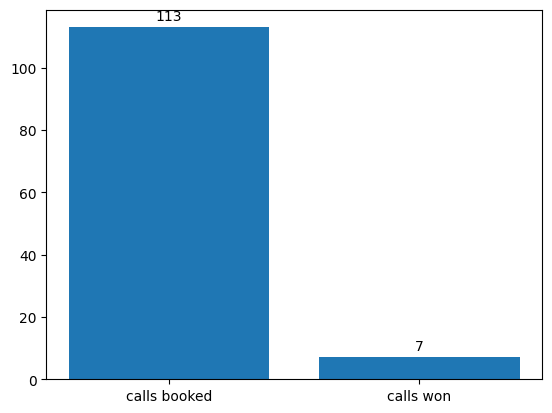

In [99]:
fig, ax = plt.subplots()
counts = [len(rnr_leads), len(won)]
bars = ax.bar(["calls booked", "calls won"], counts)
ax.bar_label(bars, fmt='%d', padding=3)
plt.show()

Call Outcome _y
No Show              32
Disqualified         22
Lost                 12
Proposal Made         8
Won: Payment Plan     4
Won: Paid In Full     3
Canceled              2
Name: count, dtype: int64


Text(0.5, 1.0, 'Breakdown of call outcomes')

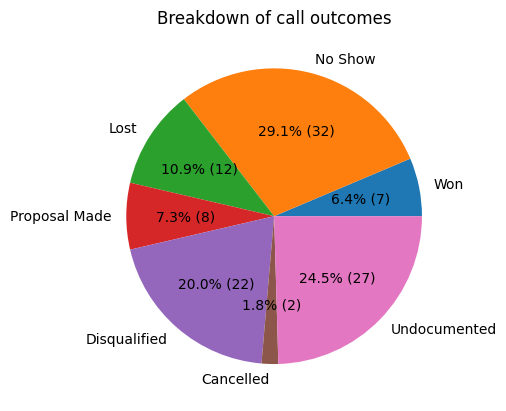

In [101]:
total_leads = len(rnr_leads)

print(merged["Call Outcome _y"].value_counts())
noshows = merged[merged["Call Outcome _y"].str.contains("No Show", case=False, na=False)]
disqualified = merged[merged["Call Outcome _y"].str.contains("Disqualified", case=False, na=False)]
lost = merged[merged["Call Outcome _y"].str.contains("Lost", case=False, na=False)]
cancelled = merged[merged["Call Outcome _y"].str.contains("Canceled", case=False, na=False)]
proposal_made = merged[merged["Call Outcome _y"].str.contains("Proposal Made", case=False, na=False)]
undocumented = merged[merged["Call Outcome _y"].isna()]
sizes = [len(won), len(noshows), len(lost),  len(proposal_made), len(disqualified), len(cancelled), len(undocumented)]
labels = ["Won", "No Show",  "Lost",  "Proposal Made", "Disqualified", "Cancelled", "Undocumented"]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}% ({int(round(p * sum(sizes) / 100))})')
plt.title("Breakdown of call outcomes")

Qualified?
No           44
Yes - MCM    36
Yes          28
Yes - LBD     5
Name: count, dtype: int64
44
80
33


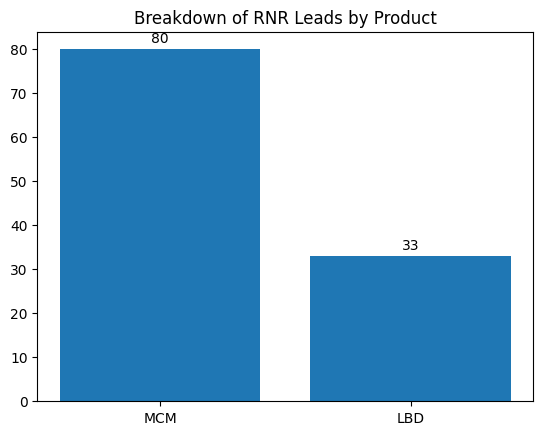

In [102]:

print(rnr_leads["Qualified?"].value_counts())
fig, ax = plt.subplots()

print(len(rnr_leads[rnr_leads["Qualified?"]=="No"]))
mcm = len(rnr_leads[rnr_leads["Qualified?"]=="Yes - MCM"])+len(rnr_leads[rnr_leads["Qualified?"]=="No"])
lbd = len(rnr_leads[rnr_leads["Qualified?"]=="Yes - LBD"])+len(rnr_leads[rnr_leads["Qualified?"]=="Yes"])
print(mcm)
print(lbd)
counts = [mcm, lbd]

bars = ax.bar(["MCM", "LBD"], counts)
ax.bar_label(bars, fmt='%d', padding=3)
plt.title("Breakdown of RNR Leads by Product")
plt.show()




